In [1]:
# import package 
#-*- coding:utf-8 -*-
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
import chardet

In [7]:
# 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡
file_list = glob('google退出中國市場影響*.txt')
type(file_list)
file_list

['google退出中國市場影響1.txt',
 'google退出中國市場影響10.txt',
 'google退出中國市場影響2.txt',
 'google退出中國市場影響3.txt',
 'google退出中國市場影響4.txt',
 'google退出中國市場影響5.txt',
 'google退出中國市場影響6.txt',
 'google退出中國市場影響7.txt',
 'google退出中國市場影響8.txt',
 'google退出中國市場影響9.txt']

In [8]:
# t 為儲存每一篇文章的list， ttolines為儲存文章中每一句話的list
t = []
i=0
for file in file_list:
    with open(file,'rb') as f :
        text=f.read()
        encode=chardet.detect(text)
    print(i)
    print(encode["encoding"])
    i=i+1
#     try:
    with open(file ,'r', encoding = encode["encoding"]) as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)


0
UTF-8-SIG
1
UTF-8-SIG
2
UTF-8-SIG
3
UTF-8-SIG
4
UTF-8-SIG
5
UTF-8-SIG
6
UTF-8-SIG
7
UTF-8-SIG
8
UTF-8-SIG
9
UTF-8-SIG


In [9]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [10]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df


/Users/apple/anaconda3/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,,,!,(,),",",-,.,/,02,...,龍頭,龐大,％,（,）,，,／,：,；,？
0,7,13.0,0.0,0.0,0.0,0.0,0.0,16.0,4.0,0.0,...,0.0,0.0,0.0,4.0,4.0,43,0.0,2.0,0.0,0.0
1,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0
2,36,18.0,0.0,0.0,0.0,1.0,0.0,25.0,0.0,0.0,...,0.0,0.0,1.0,15.0,15.0,131,0.0,7.0,1.0,4.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,18,0.0,0.0,0.0,0.0
4,10,3.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,50,0.0,4.0,1.0,1.0
5,56,5.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,...,1.0,0.0,3.0,5.0,5.0,94,0.0,1.0,0.0,0.0
6,26,44.0,0.0,0.0,0.0,4.0,6.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,36,0.0,0.0,0.0,2.0
7,3,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11,0.0,1.0,0.0,0.0
8,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,27,0.0,0.0,5.0,0.0
9,4,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,5.0,78,1.0,0.0,3.0,0.0


In [12]:
for i in range(len(df.columns.tolist())):
    print(i)
    print(df.columns.tolist()[i])

0


1
 
2
!
3
(
4
)
5
,
6
-
7
.
8
/
9
02
10
1
11
1%
12
1.2
13
10
14
1167
15
12
16
13
17
15
18
17
19
17.9%
20
19
21
1999
22
2
23
2.5
24
20
25
2002
26
2005
27
2006
28
2007
29
2008
30
2009
31
2010
32
2015
33
21
34
220
35
23
36
230
37
24
38
25
39
28.9%
40
3
41
3.84
42
30
43
34
44
35.6%
45
352
46
36
47
4
48
40%
49
5
50
558
51
58.4%
52
6
53
6%
54
60
55
600
56
69
57
7
58
73
59
77%
60
8
61
9
62
96%
63
97%
64
:
65
?
66
Adobe
67
Amazon
68
Android
69
Baidu
70
Blogger
71
Buzz
72
CNNIC
73
Center
74
China
75
Clinton
76
David
77
Docs
78
Don
79
Drummond
80
EPIC
81
Electronic
82
FTC
83
FaceBook
84
Facebook
85
Federal
86
GFW
87
GOOGLE
88
GOOLE
89
Gmail
90
Google
91
Hillary
92
ICP
93
Images
94
Information
95
Jessica
96
Kayak
97
LG
98
Mainland
99
Monster
100
News
101
Nicole
102
PageRank
103
Picasa
104
Powell
105
Privacy
106
SEO
107
Search
108
SecureWorks
109
Spreadsheet
110
Trade
111
Twitter
112
WebMD
113
Wong
114
YOUTUBE
115
Yahoo
116
Yelp
117
YouTube
118
availability
119
be
120
cloud
121
cn
122
com
123


1613
臨言論
1614
自
1615
自中國
1616
自動
1617
自大
1618
自居
1619
自己
1620
自從
1621
自我
1622
自此
1623
自然
1624
自由
1625
自稱
1626
至
1627
至少
1628
至於
1629
致知
1630
與
1631
興趣
1632
舉例
1633
舉動
1634
般能夠
1635
艱難
1636
色情
1637
艾瑞諮詢
1638
花
1639
花朵
1640
花費
1641
花費極
1642
花費近
1643
苛
1644
若
1645
若敵
1646
若要
1647
莊孟德
1648
華盛頓
1649
萎縮
1650
萬
1651
萬人
1652
萬條
1653
落實
1654
著
1655
著墨
1656
蓬勃
1657
蕊
1658
蕩
1659
藉口
1660
藥物
1661
處
1662
處理
1663
蛇
1664
行動
1665
行動會
1666
行業
1667
行為
1668
行銷
1669
行銷部
1670
術
1671
表明
1672
表示
1673
表面
1674
衰退
1675
被
1676
被毀
1677
被迫
1678
裡
1679
製
1680
複
1681
西方
1682
西藏
1683
西部
1684
要
1685
要分
1686
要求
1687
要針
1688
見
1689
規模
1690
規範
1691
規範外
1692
規範需
1693
視為
1694
覬覦
1695
觀看
1696
角度
1697
解決
1698
解除
1699
言論
1700
計劃
1701
計畫
1702
訊息
1703
討論
1704
討論區
1705
記者
1706
訪問
1707
設備
1708
設立
1709
設置
1710
設計
1711
許
1712
許可證
1713
許多
1714
許會
1715
詆
1716
詞
1717
試圖
1718
話
1719
話題
1720
該
1721
認同度
1722
認清此
1723
認為
1724
語言
1725
語音
1726
說
1727
說大眾
1728
說明
1729
說法
1730
說白
1731
誰
1732
誹謗
1733
調
1734
調查
1735
調機構
1736
談判
1737
請
1738
證將
1

In [11]:
df

,,,!,(,),",",-,.,/,02,...,龍頭,龐大,％,（,）,，,／,：,；,？
0,7,13.0,0.0,0.0,0.0,0.0,0.0,16.0,4.0,0.0,...,0.0,0.0,0.0,4.0,4.0,43,0.0,2.0,0.0,0.0
1,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0
2,36,18.0,0.0,0.0,0.0,1.0,0.0,25.0,0.0,0.0,...,0.0,0.0,1.0,15.0,15.0,131,0.0,7.0,1.0,4.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,18,0.0,0.0,0.0,0.0
4,10,3.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,50,0.0,4.0,1.0,1.0
5,56,5.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,...,1.0,0.0,3.0,5.0,5.0,94,0.0,1.0,0.0,0.0
6,26,44.0,0.0,0.0,0.0,4.0,6.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,36,0.0,0.0,0.0,2.0
7,3,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11,0.0,1.0,0.0,0.0
8,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,27,0.0,0.0,5.0,0.0
9,4,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,5.0,78,1.0,0.0,3.0,0.0


In [14]:
#htc
# df_drop = df.drop(df.columns.tolist()[0:479],axis=1)
# df_drop = df_drop.drop(df_drop.columns.tolist()[-21:],axis=1)
# df_drop
#google退出中國市場影響
df_drop = df.drop(df.columns.tolist()[0:152],axis=1)
df_drop = df_drop.drop(df_drop.columns.tolist()[-8:],axis=1)
df_drop

,一,一些,一位,一個,一句,一夜,一定,一家,一年,一度,...,高端,高舉言論,高達,鮑爾,黃,黑客,默認,點都,龍頭,龐大
0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# for i in range(len(df_drop.columns.tolist())):
#     print(i)
#     print(df_drop.columns.tolist()[i])

In [20]:
df_drop.to_csv("google退出中國市場影響.csv")

In [15]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extractionter
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
#df_tfidf[df_tfidf>0.0001].dropna(axis=1)


,一,一些,一位,一個,一句,一夜,一定,一家,一年,一度,...,高端,高舉言論,高達,鮑爾,黃,黑客,默認,點都,龍頭,龐大
0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


google退出中國市場影響1.txt


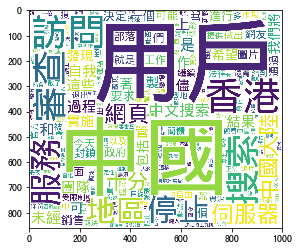

/Users/apple/anaconda3/envs/python3/lib/python3.5/site-packages/wordcloud/wordcloud.py:464: RuntimeWarning: invalid value encountered in double_scalars
  font_size = int(round((rs * (freq / float(last_freq))


google退出中國市場影響2.txt


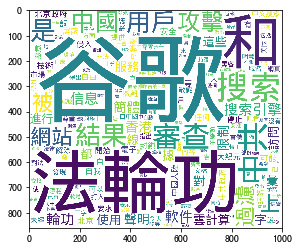

google退出中國市場影響4.txt


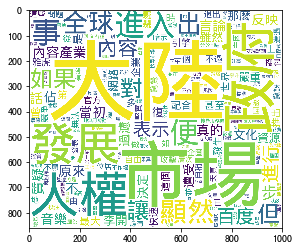

google退出中國市場影響5.txt


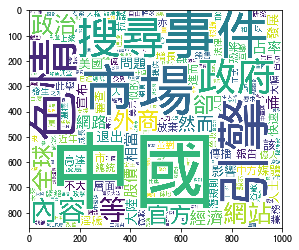

google退出中國市場影響6.txt


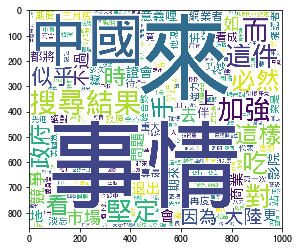

google退出中國市場影響9.txt


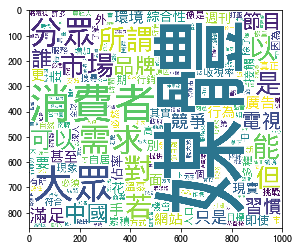

In [18]:
#結果圖呈現
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 
tfidf_dict = df_tfidf.to_dict(orient='records')
remove_list = ['就','在','也','了','我們','之','及','。','於','或','與','係','本','為','一','合','公司','民國','年度','月','日','註','其他','年','應','的','六','“','、','『','』','「','」']
for i in range(len(tfidf_dict)):
    #print(i)
    for item in remove_list:
        tfidf_dict[i].pop(item, None)
    wordcloud = WordCloud(font_path = 'wqy-microhei.ttc', background_color="white",width=1000, height=860, margin=2)
    try:
        wordcloud.fit_words(tfidf_dict[i])
        print(file_list[i])
        plt.imshow(wordcloud)
        plt.show()
    except: pass